# Model templates

In practice, *nuance* can be used to search for any signals that linearly scale in amplitude.

When using the core functions, a custom model can be provided as a `callable` with the signature 

```
model(time: jax.numpy.Array, t0: float, D: float, P: float = None) -> jax.numpy.Array
```

where `t0` is the epoch of the model, `D` its duration and `P` its period, if any. The default model is the empircial transit model from [Protopapas (2005)](https://ui.adsabs.harvard.edu/abs/2005MNRAS.362..460P/abstract), where `c` controls the ingress and egress sharpness.

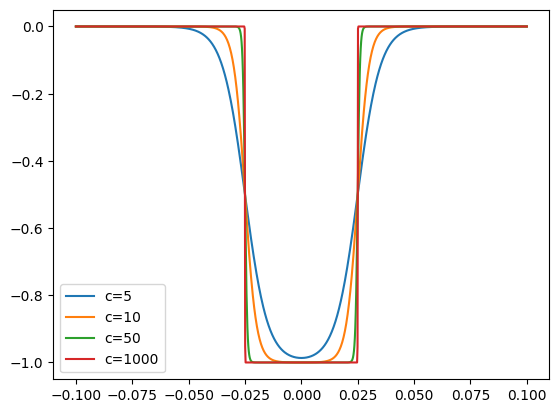

In [3]:
import numpy as np
from functools import partial
from nuance.core import transit
import matplotlib.pyplot as plt

t = np.linspace(-0.1, 0.1, 1000)

for c in [5, 10, 50, 1000]:
    model = partial(transit, c=c)
    plt.plot(t, model(t, 0.0, 0.05), label=f"c={c}")

_ = plt.legend()

```{note}
In order for the scale to be intepretable it's a good practice to have the models normalized to `-1` (sign due to the fact that *nuance* has been implemented for signals with *depths*).
```

Here is an overview of some other templates readily available in nuance

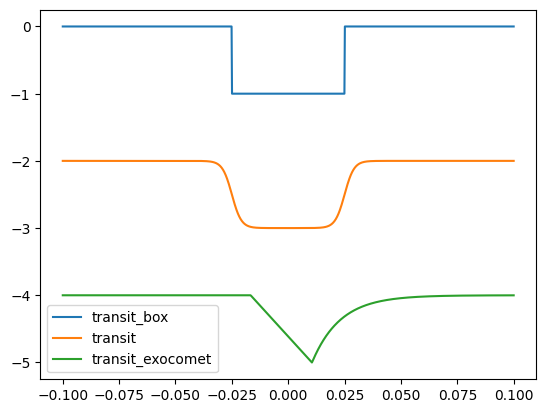

In [5]:
from nuance.core import transit_box, transit, transit_exocomet

models = [transit_box, transit, transit_exocomet]

for i, model in enumerate(models):
    plt.plot(t, model(t, 0.0, 0.05) - 2 * i, label=model.__name__)

_ = plt.legend()

```{note}
Models provided to nuance core function must be written with [JAX](https://jax.readthedocs.io/en/latest/index.html).
```